In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
# since TSNE is utterly slow i will only test on a small sample
samplesize = 512
corpus = pd.read_csv('./data/hate_speech.csv', index_col=None).iloc[:512]

In [12]:
corpus.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [13]:
corpus.shape

(512, 7)

In [14]:
cv=CountVectorizer()
word_count_vector=cv.fit_transform(corpus.tweet)

In [15]:
# 24k docs -> 35k words
word_count_vector.shape

(512, 2431)

In [16]:
type(word_count_vector)

scipy.sparse.csr.csr_matrix

In [17]:
# tf-idf scores
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vectorizer=TfidfVectorizer()
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(corpus.tweet)
tfidf_vectorizer_vectors.shape

(512, 2431)

In [48]:
print(tfidf_vectorizer.get_feature_names()[:4])

['00sexilexi00', '06e77bgwbx', '10', '11']


In [49]:
len(tfidf_vectorizer.get_feature_names())

2431

In [18]:
type(tfidf_vectorizer_vectors)

scipy.sparse.csr.csr_matrix

In [26]:
tf_idf_embedded  = TSNE(n_components=2).fit_transform(tfidf_vectorizer_vectors.T.toarray())

In [27]:
type(tf_idf_embedded)

numpy.ndarray

In [51]:
df_tf_idf_embedded = pd.DataFrame(tf_idf_embedded, index = tfidf_vectorizer.get_feature_names())
df_tf_idf_embedded.shape

(2431, 2)

In [52]:
df_tf_idf_embedded.head

<bound method NDFrame.head of                          0           1
00sexilexi00     19.765434 -107.663902
06e77bgwbx      -15.064590  106.793785
10              -77.897446  -38.576111
11              -34.113808   -8.383503
127752           85.554527    7.689703
127807          -74.764793   18.701334
127815            6.961668   11.697473
127868            4.785373   11.629201
127942          122.247604   -4.185947
128034          -53.019398   66.249077
128049         -107.300888   19.037844
128056           45.661793  -64.182755
128064         -118.787529   73.105042
128069          123.058769   51.749283
128074          -93.676254   61.501690
128075           -0.351882   86.691193
128076          -48.709267  -16.715534
128079          -69.943321   65.658119
128080          -32.493252  -14.607113
128089           16.392792   76.987801
128111            2.528924    5.539977
128120          -43.628159   33.544243
128123          -45.613533  100.829391
128128           -7.326792   -9.73

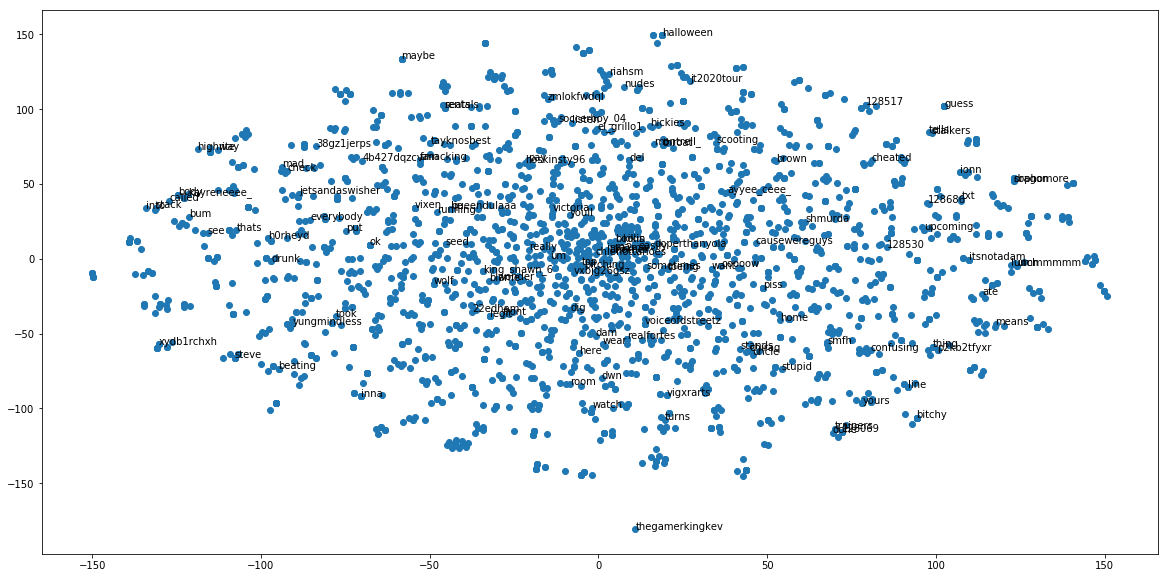

In [67]:
plt.figure(figsize=(20,10))
plt.scatter(tf_idf_embedded[:,0], tf_idf_embedded[:,1])
# only annotate some
samplesize = 128
for i, txt in enumerate(random.sample(list(df_tf_idf_embedded.index),samplesize)):
    plt.annotate(txt, (tf_idf_embedded[:,0][i], tf_idf_embedded[:,1][i]))